# Project 1, Part 5, Data Visualization



# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd

import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)
    

In [3]:
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

# 1.5 Example of a Data Visualization created using Python

The data science team would like for you to create an example of a data visualization using Python from data in a Pandas dataframe containing data from an SQL query.

Write 1 and only 1 query.  Note that the query may have as many subqueries, including with clauses, as you wish. 

Once you have the data in a Pandas dataframe, you may write as much Python code as you wish to produce the data visualization.

You may only use Python modules that are currently installed in the Anaconda Docker container.  You may not install additional modules or any other software.

All work must be done in Docker in your VM in AWS.  You may not use any external data visualization systems, such as Tableau, etc.

You may use any code from the labs to pattern your code after, however for the data visualization, you cannot wholesale copy a data visualization from the labs.

Ensure that it is properly titled, including titles for axes if present.

Ensure that when you check this Juptyer Notebook into GitHub that the query results in the Pandas dataframe are clearly visible  and that the data visualization is clearly visible.



In [4]:
rollback_before_flag = True
rollback_after_flag = True

query = """
-- assign quarters. assume quarter distribution is Jan-Mar for Q1, Apr-Jun for Q2, Jul-Sept for Q3, and Oct-Dec for Q4.
-- find product's quantity sold for each quarter
WITH product_sold_in_quarter as
(select p.description as product_name,
        case 
            when sa.sale_date >='2020-01-01' and sa.sale_date <='2020-03-31' then '2020 Q1'
            when sa.sale_date >='2020-04-01' and sa.sale_date <='2020-06-30' then '2020 Q2'
            when sa.sale_date >='2020-07-01' and sa.sale_date <='2020-09-30' then '2020 Q3'
            when sa.sale_date >='2020-10-01' and sa.sale_date <='2020-12-31' then '2020 Q4'
            else NULL
            end as quarter,
        li.quantity as sold_quantity
from sales sa join line_items li on sa.sale_id = li.sale_id and sa.store_id = li.store_id
join products p on p.product_id = li.product_id)

select psq.quarter, psq.product_name, sum(psq.sold_quantity) as total_sold
from product_sold_in_quarter psq
group by psq.product_name, psq.quarter 
order by psq.quarter, psq.product_name

"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,quarter,product_name,total_sold
0,2020 Q1,Brocolli Stir Fry,223361
1,2020 Q1,Chicken Salad,55870
2,2020 Q1,Curry Chicken,335228
3,2020 Q1,Eggplant Lasagna,390937
4,2020 Q1,Pistachio Salmon,447038
5,2020 Q1,Spinach Orzo,112104
6,2020 Q1,Teriyaki Chicken,280448
7,2020 Q1,Tilapia Piccata,168158
8,2020 Q2,Brocolli Stir Fry,225684
9,2020 Q2,Chicken Salad,56407


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Pivot table with margins for reference
pivot_by_product=(df.pivot_table(index='product_name',columns='quarter',aggfunc="sum",values='total_sold',margins=True)\
                  .astype(int))

#Create temporary sortkey sort on sortkey and values, drop sortkey
pivot_by_product=pivot_by_product.assign(sortkey=pivot_by_product.index == 'All')\
                .sort_values(['sortkey','All'], ascending=[True, False])\
                .drop('sortkey', axis=1)
pivot_by_product

,2020 Q1,2020 Q2,2020 Q3,2020 Q4,All
product_name,,,,,
Pistachio Salmon,447038,451780,455747,474213,1828778
Eggplant Lasagna,390937,394048,398800,415273,1599058
Curry Chicken,335228,337335,340621,355700,1368884
Teriyaki Chicken,280448,282188,284812,297565,1145013
Brocolli Stir Fry,223361,225684,227461,237478,913984
Tilapia Piccata,168158,169562,171340,178177,687237
Spinach Orzo,112104,112432,114304,117929,456769
Chicken Salad,55870,56407,57066,59218,228561
All,2013144,2029436,2050151,2135553,8228284


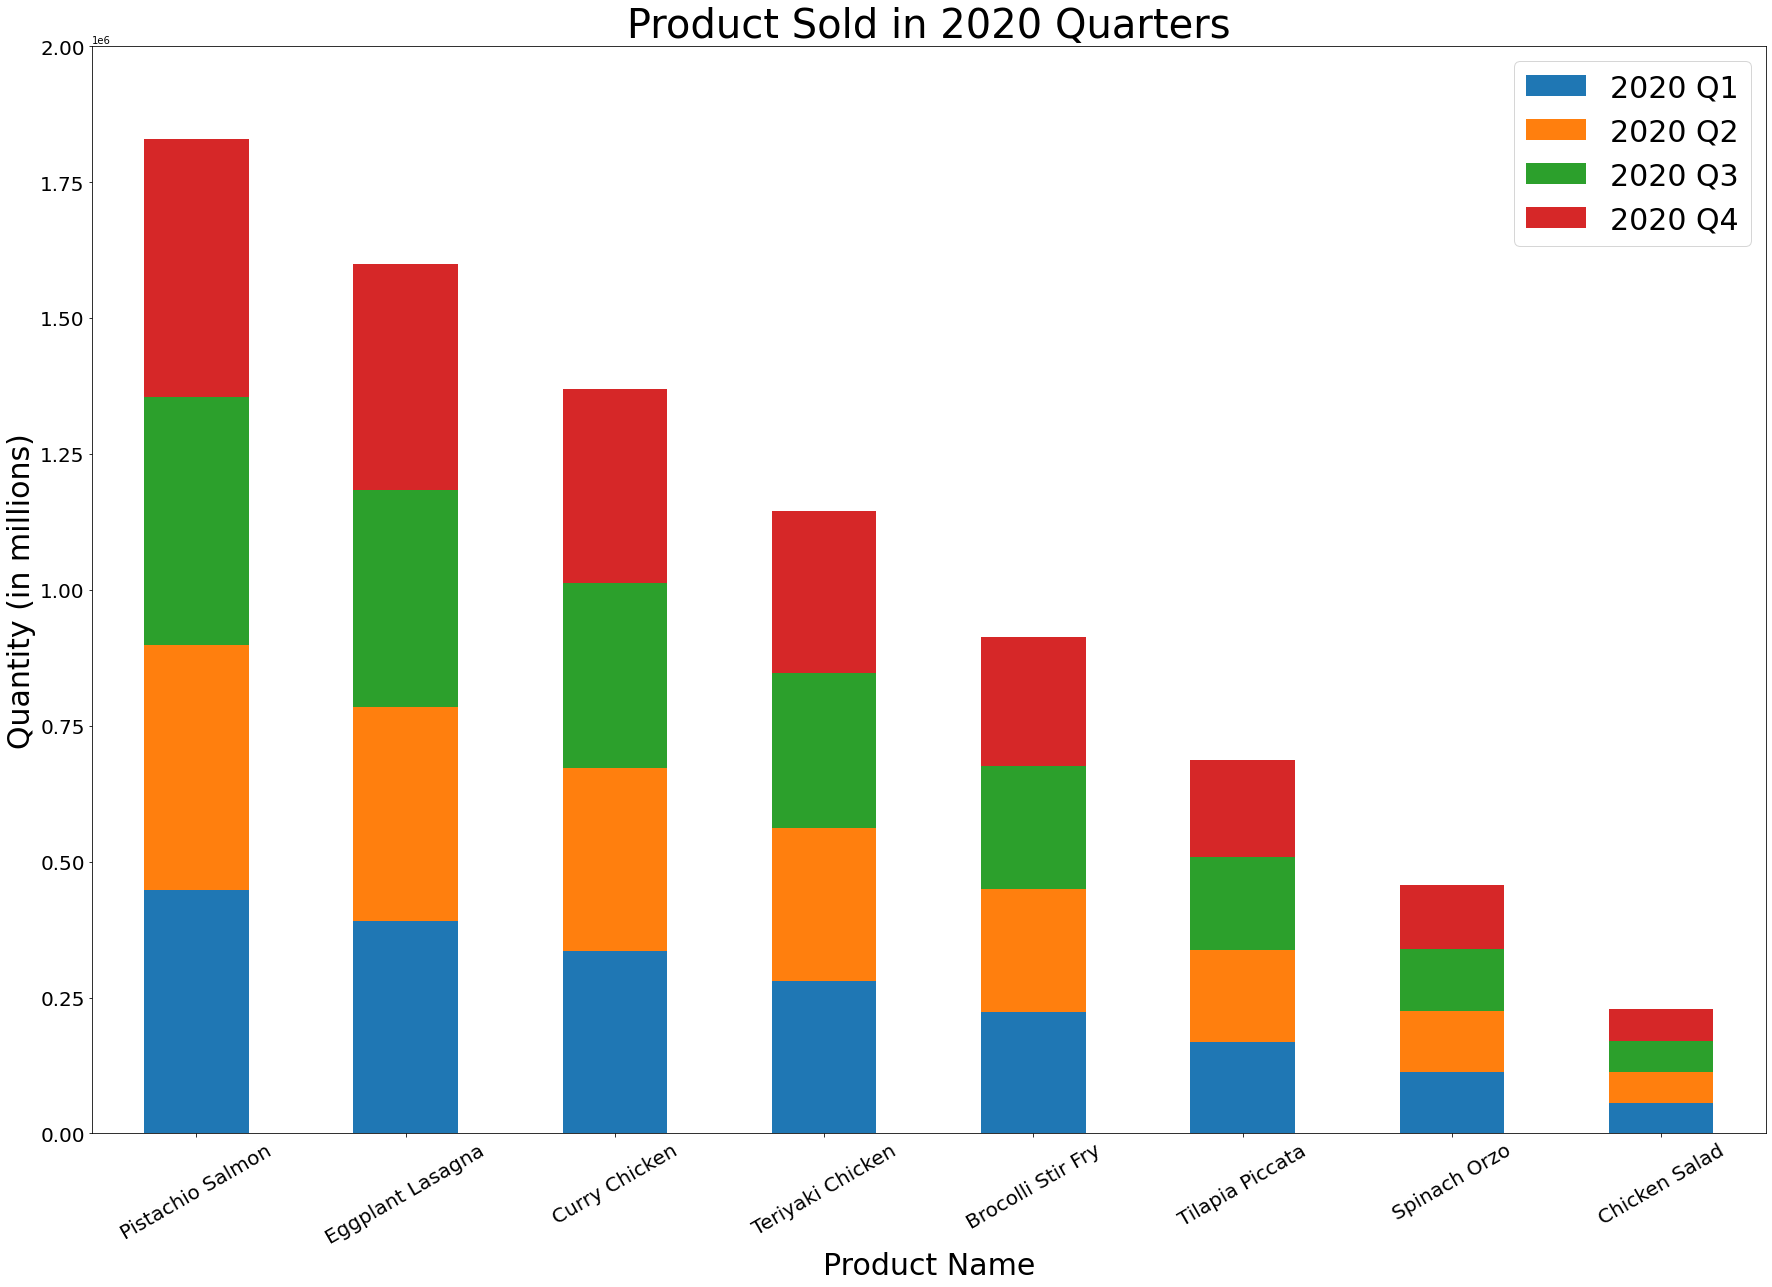

In [7]:
#Aggregate points --> Sort --> Retrieve Index Values
sort_list = df.groupby('product_name').sum().sort_values('total_sold',ascending=False).index

#Pivot --> Reindex columns --> Transpose & plot
ax=(df.pivot(index='quarter',columns='product_name',values='total_sold')
   .reindex(sort_list,axis='columns') # Using above sorted list
   .T
   .plot(kind='bar',stacked=True,figsize=(30,20),fontsize=20)
   )

#legend
#ax.legend(fontsize=25,loc=(1.01,0.6))
ax.legend(fontsize=30)

#title
ax.set_title('Product Sold in 2020 Quarters', fontsize=40)

#ylim
ax.set_ylim(0,2000000)

#setlabels
ax.set_xlabel('Product Name',fontsize=30)
ax.set_ylabel('Quantity (in millions)',fontsize=30)

#rotation
plt.xticks(rotation=30)
plt.show()

#clear un-used wordings
pass